# 第3章 特征值和特征向量

## 3.1 特征值和特征向量

### 3.1.1 基本概念

In [1]:
import numpy as np
from numpy.linalg import eig

A = np.array([[1,2,3], [4,5,6], [7,8,9]])
values, vectors = eig(A)
values

array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15])

In [2]:
vectors

array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]])

In [3]:
A.dot(vectors[:,0])

array([ -3.73863537,  -8.46653421, -13.19443305])

In [4]:
values[0] * vectors[:,0]

array([ -3.73863537,  -8.46653421, -13.19443305])

## 3.3 相似矩阵

### 3.3.3 对角化

In [5]:
from sympy import *

M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])

# 特征值
M.eigenvals()

{3: 1, -2: 1, 5: 2}

In [6]:
M.eigenvects()

[(-2,
  1,
  [Matrix([
   [0],
   [1],
   [1],
   [1]])]),
 (3,
  1,
  [Matrix([
   [1],
   [1],
   [1],
   [1]])]),
 (5,
  2,
  [Matrix([
   [1],
   [1],
   [1],
   [0]]),
   Matrix([
   [ 0],
   [-1],
   [ 0],
   [ 1]])])]

In [7]:
P, D = M.diagonalize()

In [8]:
P

Matrix([
[0, 1, 1,  0],
[1, 1, 1, -1],
[1, 1, 1,  0],
[1, 1, 0,  1]])

In [9]:
D

Matrix([
[-2, 0, 0, 0],
[ 0, 3, 0, 0],
[ 0, 0, 5, 0],
[ 0, 0, 0, 5]])

In [10]:
lam = symbols('lambda')
f = M.charpoly(lam)
factor(f.as_expr())

(lambda - 5)**2*(lambda - 3)*(lambda + 2)

## 3.4 投影

### 3.4.3 再探对称矩阵

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from numpy import linalg as la

A = np.array([[3, 1],[1, 0.8]]) 
lam, v = la.eig(A)
print("lam =", np.round(lam, 4))
print("v =", np.round(v, 4))

lam = [3.3866 0.4134]
v = [[ 0.9327 -0.3606]
 [ 0.3606  0.9327]]


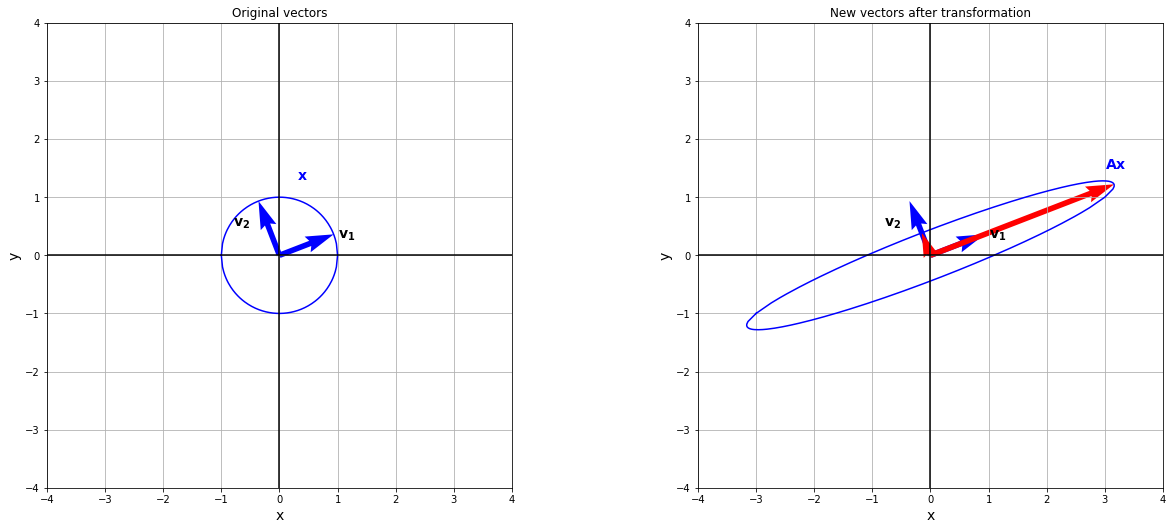

In [15]:
# 创设向量 x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)
xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

# 计算 Ax
t = A @ x # 等效于 A.dot(x)，即矩阵乘法
origin = [0], [0] # 坐标原点

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,30))
plt.subplots_adjust(wspace=0.4)

# 绘制表示 x 的图示
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, v[0,:], v[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.3, "$\mathbf{v_1}$", fontsize=14)
ax1.text(-0.8, 0.5, "$\mathbf{v_2}$", fontsize=14)
ax1.text(0.3, 1.3, "$\mathbf{x}$", color='b', fontsize=14)

# 绘制表示 t=Ax 的图示
ax2.plot(t[0, :], t[1, :], color='b')
# 特征向量图示
ax2.quiver(*origin, v[0,:].T, v[1,:].T, color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
# lam*v_1, lam*v_2 图示
ax2.quiver(*origin, lam*v[0,:], lam*v[1,:], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.3, "$\mathbf{v_1}$", fontsize=14)
ax2.text(-0.8, 0.5, "$\mathbf{v_2}$", fontsize=14)
ax2.text(3, 1.5, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

## 3.5 矩阵分解

### 3.5.1 QR分解

In [1]:
from sympy import *
X = Matrix([[2,1,1],[1,3,2],[1,0,0]])
Q, R = X.QRdecomposition()
Q

Matrix([
[sqrt(6)/3, -2*sqrt(210)/105, 3*sqrt(35)/35],
[sqrt(6)/6, 13*sqrt(210)/210,  -sqrt(35)/35],
[sqrt(6)/6,    -sqrt(210)/42,   -sqrt(35)/7]])

In [2]:
R

Matrix([
[sqrt(6), 5*sqrt(6)/6,      2*sqrt(6)/3],
[      0, sqrt(210)/6, 11*sqrt(210)/105],
[      0,           0,      sqrt(35)/35]])

### 3.5.2 特征分解

In [6]:
import numpy as np
import numpy.linalg as la

A = np.array([[3, 1],[1, 2]]) 
lam, v = la.eig(A)
print("lam =", np.round(lam, 4))
print("v =", np.round(v, 4))

lam = [3.618 1.382]
v = [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


In [7]:
v1 = v[:,0].reshape(2,1)
lam1 = lam[0]
A1 = lam1 * (v1.dot(v1.T))

v2 = v[:,1].reshape(2,1)
lam2 = lam[1]
A2 = lam2 * (v2.dot(v2.T))

print("A1 = ", np.round(A1, 4))
print("A2 = ", np.round(A2, 4))

A1 =  [[2.618 1.618]
 [1.618 1.   ]]
A2 =  [[ 0.382 -0.618]
 [-0.618  1.   ]]


In [9]:
lam_A1, v_A1   = la.eig(A1)
print("lam = ", np.round(lam_A1, 4))
print("v = ", np.round(v_A1, 4))

lam =  [ 3.618 -0.   ]
v =  [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


### 3.5.3 奇异值分解

In [10]:
import numpy as np
from numpy.linalg import svd
A = np.array([[1, 2], [3, 4], [5, 6]])
U, s, VT = svd(A)
print("U = ", U)
print('s = ', s)
print('VT = ', VT)

U =  [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
s =  [9.52551809 0.51430058]
VT =  [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [11]:
Sigma = np.zeros(A.shape)

In [12]:
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
Sigma

array([[9.52551809, 0.        ],
       [0.        , 0.51430058],
       [0.        , 0.        ]])

In [13]:
B = U.dot(Sigma.dot(VT))
print(B)

[[1. 2.]
 [3. 4.]
 [5. 6.]]


### 3.5.4 数据压缩

In [15]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from PIL import Image

pic = np.array(Image.open("./datasets/hepburn.jpg").convert('L'))
pic.shape

(768, 1024)

In [16]:
U, s, VT = svd(pic)

Sigma = np.zeros((pic.shape[0], pic.shape[1]))
Sigma[:min(pic.shape[0], pic.shape[1]), :min(pic.shape[0], pic.shape[1])] = np.diag(s)

Text(0.5, 1.0, 'Reconstructed image using the \n first 20 singular values')

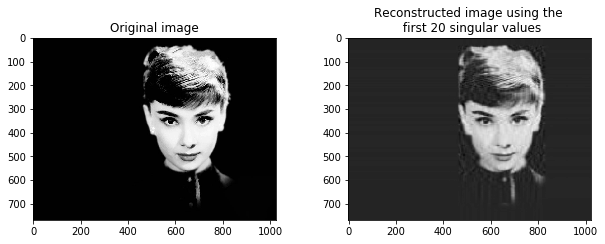

In [17]:
k = 20
pic_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(pic, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(pic_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))

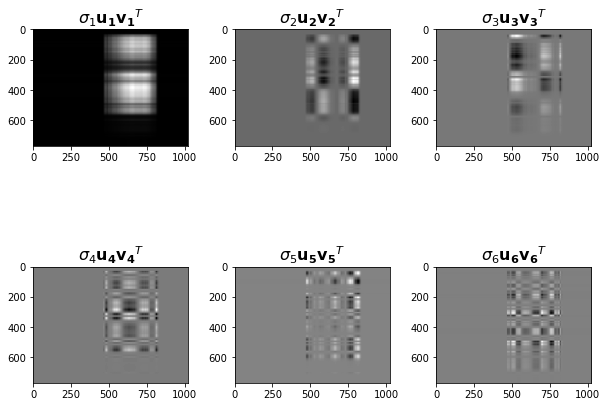

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

pic_six = 0
for i in range(0, 6):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    pic_six = mat_i + pic_six
    axes[i // 3, i % 3].imshow(mat_i, cmap='gray')
    axes[i // 3, i % 3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), fontsize=16)
plt.show()

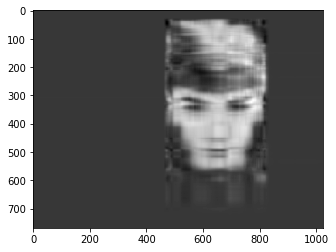

In [19]:
plt.imshow(pic_six, cmap='gray')

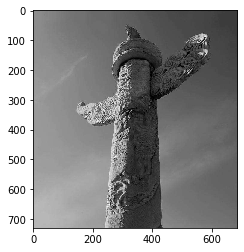

In [21]:
pillar = np.array(Image.open("./datasets/huabiao.png").convert('L'))
plt.imshow(pillar, cmap='gray')
plt.show()

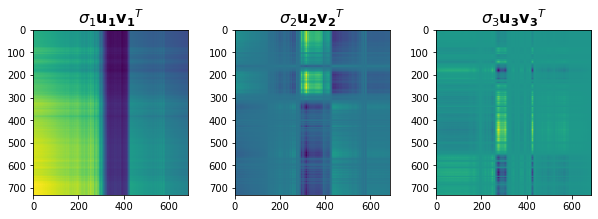

In [22]:
U, s, VT = svd(pillar)

fig, axes = plt.subplots(1, 3, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

for i in range(0, 3):
    mat_i = s[i] * U[:,i].reshape(-1,1) @ VT[i,:].reshape(1,-1)
    axes[i%3].imshow(mat_i)
    axes[i%3].set_title("$\sigma_{0}\mathbf{{u_{0}}}\mathbf{{v_{0}}}^T$".format(i+1), fontsize=16)
plt.show()

### 3.5.5 降噪

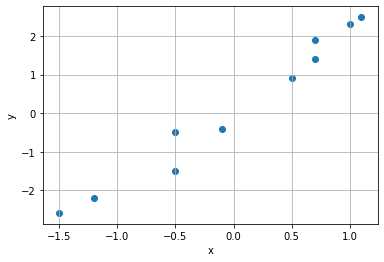

In [23]:
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt

A = np.array([[-1.2, 0.7, -0.5, 0.5, -1.5, 1, 0.7, -0.1, -0.5, 1.1], [-2.2, 1.9, -0.5, 0.9, -2.6, 2.3, 1.4, -0.4, -1.5, 2.5]])

plt.scatter(A[0, :], A[1, :])

plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [24]:
U, s, V = lg.svd(A)
s

array([6.29226561, 0.47685791])

In [25]:
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0], A.shape[1]), :min(A.shape[0], A.shape[1])] = np.diag(s)

A_approx = np.dot(U[:, :1], np.dot(Sigma[:1, :1], V[:1, :]))
print(A_approx)

[[-1.08606367  0.87462564 -0.2896289   0.44601062 -1.29893644  1.08749841
   0.67914848 -0.17521207 -0.68058321  1.18451962]
 [-2.25487753  1.81589141 -0.60132542  0.92600403 -2.69684243  2.25785632
   1.41004315 -0.36377404 -1.41302194  2.45929105]]


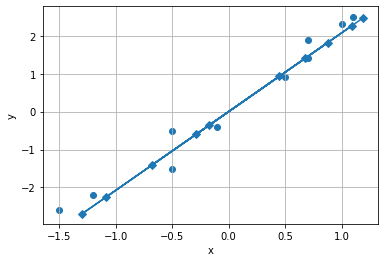

In [26]:
plt.scatter(A[0, :], A[1, :])
plt.plot(A_approx[0, :], A_approx[1, :], marker="D")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## 3.6 最小二乘法（1）

### 3.6.2 线性回归

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1,-1],[1,1],[1,2]])
y = np.array([1,1,3]).reshape((-1, 1))

reg = LinearRegression().fit(X, y)
print("直线斜率：", reg.coef_, "直线纵截距：", reg.intercept_)



直线斜率： [[0.         0.57142857]] 直线纵截距： [1.28571429]
